<a href="https://colab.research.google.com/github/nastaran-farhadi/Machine-learning-practice/blob/main/Hierarchical_clustering_country_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/gdrive/MyDrive/jadi/Country-data.csv')
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
data_dic=pd.read_csv('/content/gdrive/MyDrive/jadi/data-dictionary.csv')
data_dic.head(len(data_dic))

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [7]:
df.shape

(167, 10)

In [8]:
#check the duplicate(DataFrame with duplicates removed or None if inplace=True.)
df_copy=df.copy()
df_copy.drop_duplicates(subset=None, inplace=True)

In [9]:
df_copy.shape

(167, 10)

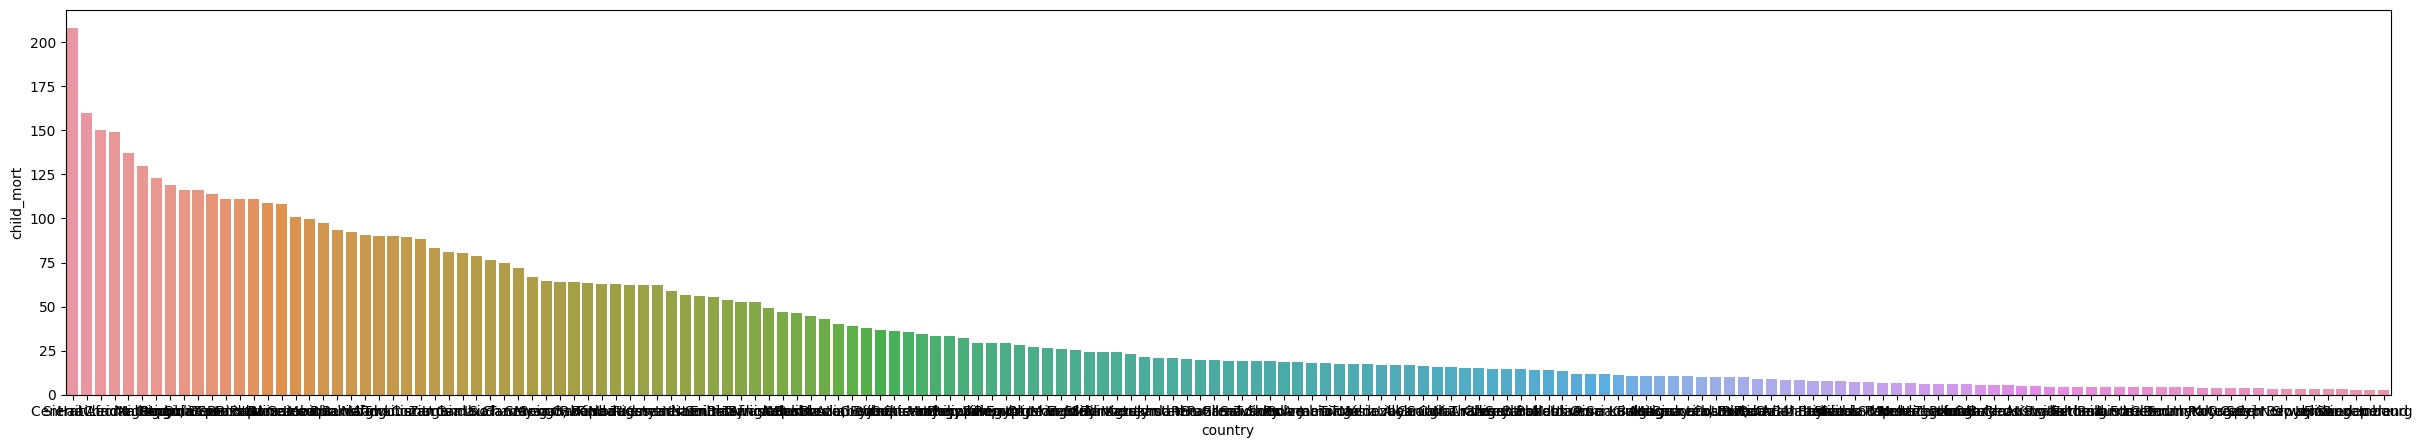

In [14]:
#sort the child moratility (DataFrame.sort_values(by, *, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None))
import seaborn as sns
plt.figure(figsize=(30,5))
child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False)
ax=sns.barplot(x='country',y='child_mort',data=child_mort)
plt.show()

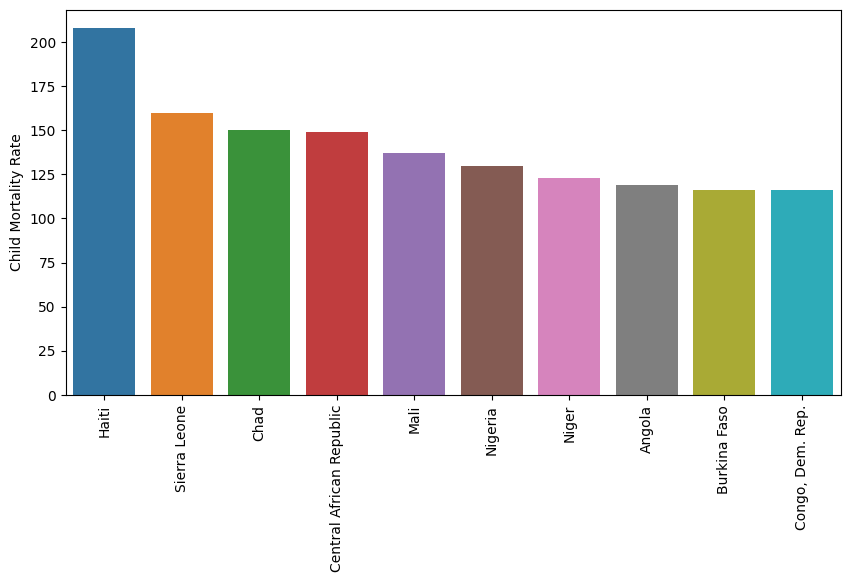

In [16]:
plt.figure(figsize = (10,5))
child_mort_top10 = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data= child_mort_top10)
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

In [18]:
df=df.drop(['country'],axis=1)
df.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [26]:
from sklearn import preprocessing   #package for normalize
df_normalized = preprocessing.normalize(df)
print(df_normalized)

[[5.28625544e-02 5.86059362e-03 4.44232996e-03 ... 3.29365361e-02
  3.41086549e-03 3.24090827e-01]
 [1.54565929e-03 2.60713615e-03 6.09883634e-04 ... 7.10444600e-03
  1.53634809e-04 3.80828101e-01]
 [2.00006203e-03 2.81327406e-03 3.05503980e-04 ... 5.60456942e-03
  2.11728178e-04 3.26750061e-01]
 ...
 [4.97959888e-03 1.53876017e-02 1.46182216e-03 ... 1.56226900e-02
  4.16747546e-04 2.79968864e-01]
 [1.20589885e-02 6.42574875e-03 1.10951262e-03 ... 1.44579347e-02
  1.00027489e-03 2.80591029e-01]
 [2.31349866e-02 1.03007762e-02 1.63977221e-03 ... 1.44767666e-02
  1.50335653e-03 4.06463062e-01]]


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [62.5, 62.5, 90.0, 90.0],
  [40.0, 40.0, 76.25, 76.25],
  [12.5, 12.5, 58.125, 58.125],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [150.0, 150.0, 182.5, 182.5],
  [112.5, 112.5, 166.25, 166.25],
  [35.3125, 35.3125, 139.375, 139.375],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [220.0, 220.0, 240.0, 240.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [230.0, 230.0, 262.5, 262.5],
  [205.0, 205.0, 246.25, 246.25],
  [87.34375, 87.34375, 225.625, 225.625],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [285.0, 285.0, 310.0, 310.0],
  [345.0

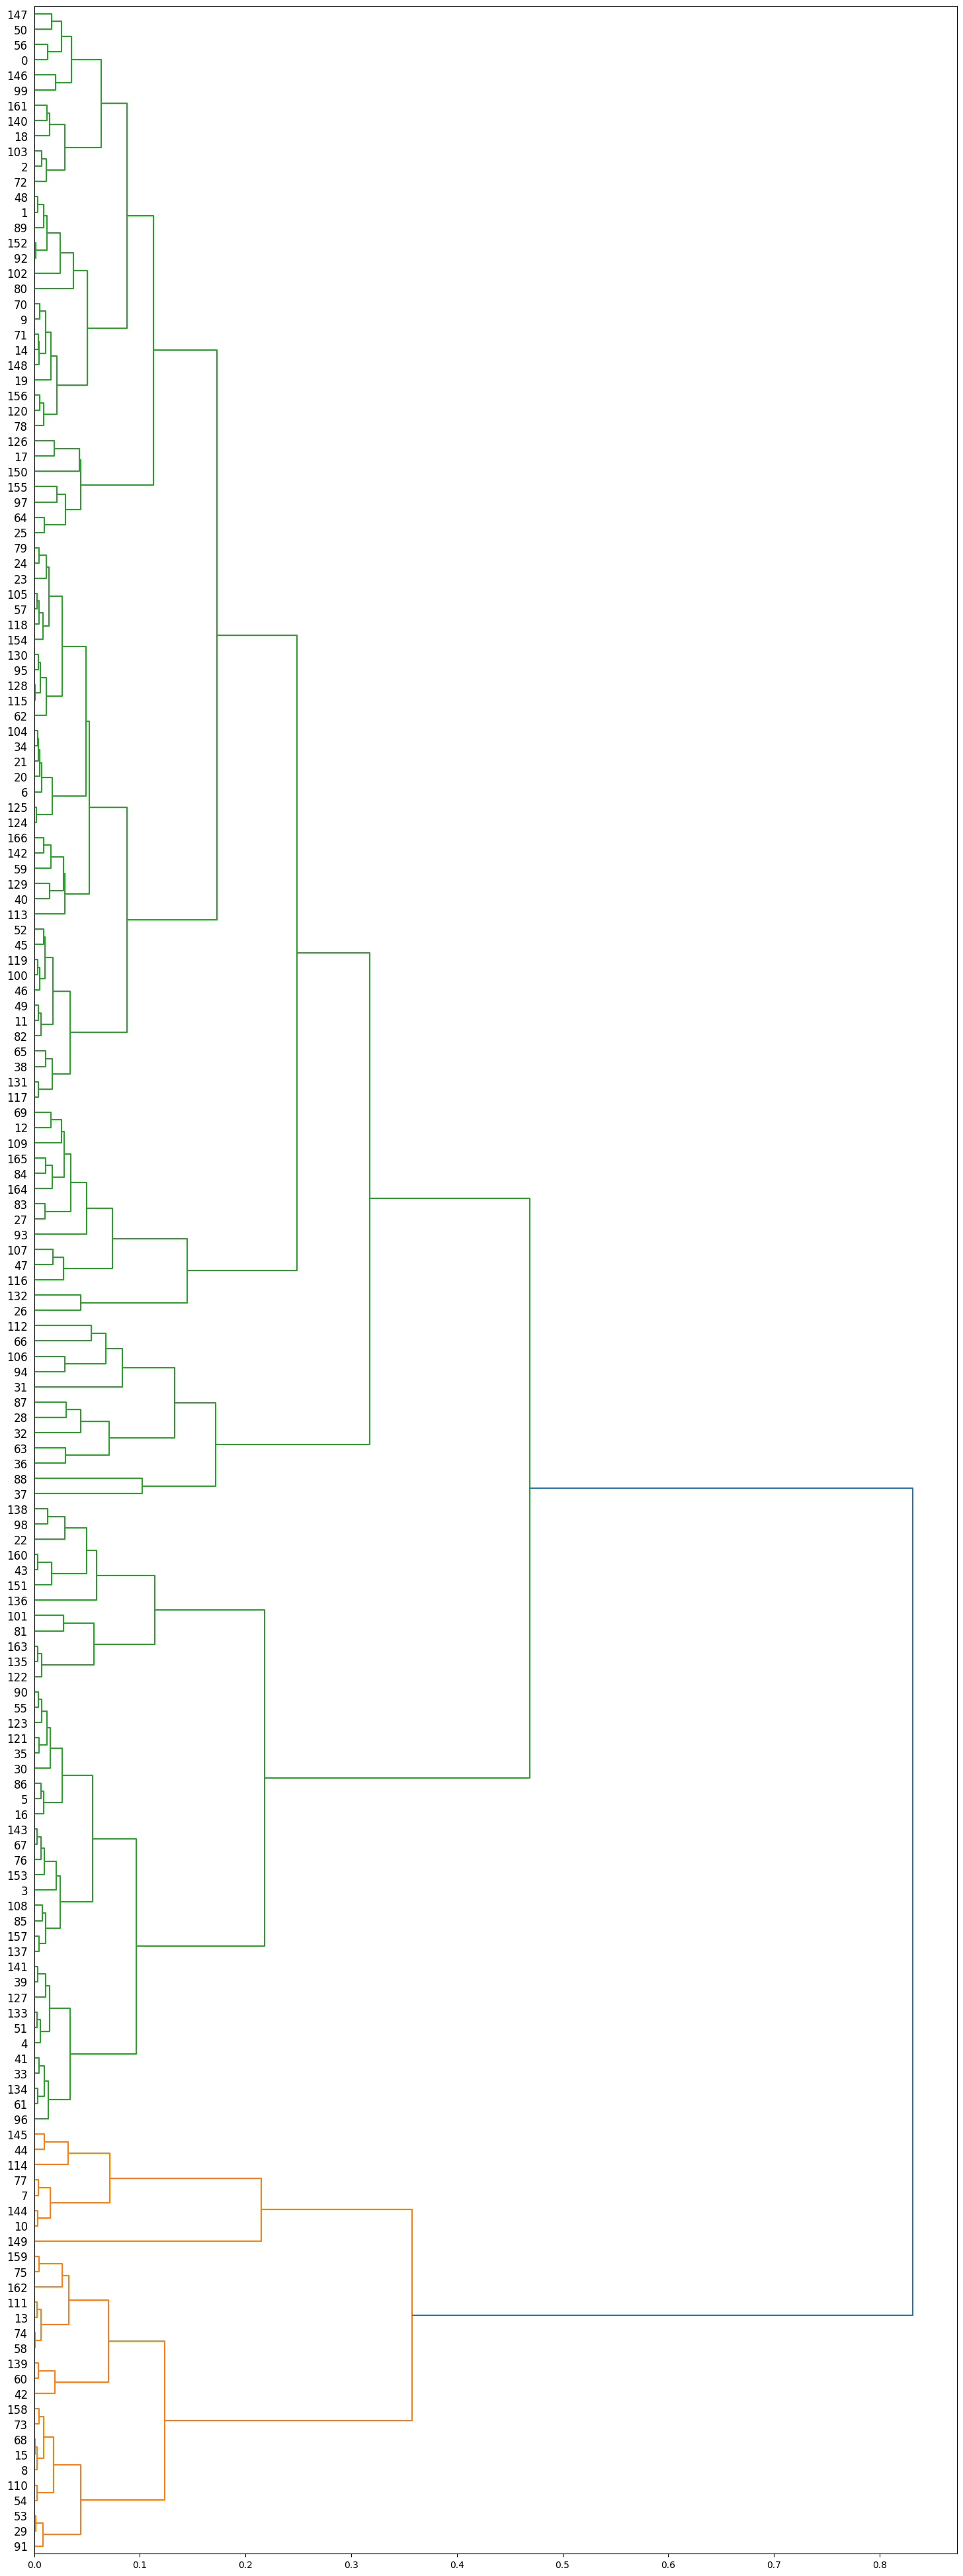

In [28]:
from scipy.cluster.hierarchy import linkage,dendrogram
z=linkage(df_normalized,method="complete",metric="euclidean")
plt.figure(figsize = (18,50))
dendrogram(z,leaf_font_size=12,orientation='right')


In [29]:
from sklearn.cluster import AgglomerativeClustering
h_complete=AgglomerativeClustering(n_clusters=4,linkage='complete',affinity="euclidean").fit(df_normalized)
h_complete.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 2, 2, 2, 0, 1, 3, 0, 1, 0, 0, 3, 0, 3, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 3, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 3, 3, 2, 0, 0, 3, 0, 3, 2, 0, 0, 0, 0,
       0, 2, 3, 0, 0, 0, 0, 3, 3, 3, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 3, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 0, 0, 2, 3, 3, 2, 0, 3, 2, 0, 0, 0])